In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline
train = pd.read_csv('AirPassengers.csv')

In [3]:
train['Month'] = pd.to_datetime(train['Month'], format='%Y-%m')
train['Year'] = train['Month'].dt.year

In [4]:
train.head()

,Month,#Passengers,Year
0,1949-01-01,112,1949
1,1949-02-01,118,1949
2,1949-03-01,132,1949
3,1949-04-01,129,1949
4,1949-05-01,121,1949


In [5]:
year = train['Year'].values.reshape(-1, 1)
values = train['#Passengers'].values

In [6]:
x=year
y=values

In [7]:
X = [i - x[len(x)//2] for i in x] 

In [8]:
x2 = [i ** 2 for i in X]
xy = [i * j for i, j in zip(X, y)]

In [9]:
table = [[i, j, k, l, m] for i, j, k, l, m in zip(x, y, X, x2, xy)]


In [10]:
print(tabulate(table, headers=["Year", "Prod", "X=x-2014", "X^2", "xy"], tablefmt="grid"))

+--------+--------+------------+-------+------+
|   Year |   Prod |   X=x-2014 |   X^2 |   xy |
+========+========+============+=======+======+
|   1949 |    112 |         -6 |    36 | -672 |
+--------+--------+------------+-------+------+
|   1949 |    118 |         -6 |    36 | -708 |
+--------+--------+------------+-------+------+
|   1949 |    132 |         -6 |    36 | -792 |
+--------+--------+------------+-------+------+
|   1949 |    129 |         -6 |    36 | -774 |
+--------+--------+------------+-------+------+
|   1949 |    121 |         -6 |    36 | -726 |
+--------+--------+------------+-------+------+
|   1949 |    135 |         -6 |    36 | -810 |
+--------+--------+------------+-------+------+
|   1949 |    148 |         -6 |    36 | -888 |
+--------+--------+------------+-------+------+
|   1949 |    148 |         -6 |    36 | -888 |
+--------+--------+------------+-------+------+
|   1949 |    136 |         -6 |    36 | -816 |
+--------+--------+------------+-------+

In [39]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

In [40]:
n=len(x)
b=(n*sum(xy)-sum(y)*sum(X))/(n*sum(x2)-(sum(X)**2))
a=(sum(y)-b*sum(X))/n
print("a=%.1f,b=%.1f"%(a,b))

a=296.3,b=31.9


In [41]:
l=[]

In [42]:
for i in range(n):
  l.append(a+b*X[i]);
print("Trend Equation : y=%d+%.2fx"%(a,b))

Trend Equation : y=296+31.92x


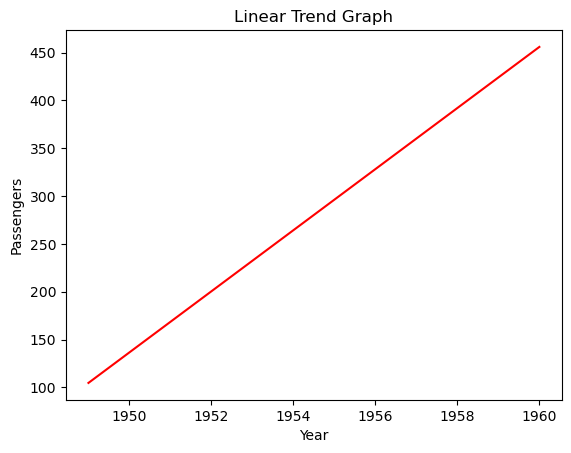

In [47]:
import matplotlib.pyplot as plt
plt.title("Linear Trend Graph")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(x,l,color='red')
plt.show()

In [46]:
pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)

array([3807.89520202])